In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./img/Dravid/1.jpg')

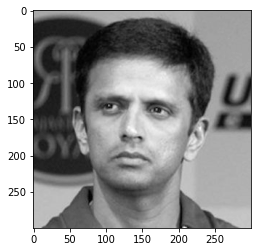

In [3]:
#Converts image to gray scale to help in Identification
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap = "gray")

In [4]:
#Initialized harrcascade and applies them to face and eye
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:\Python\Image Classification\A\model\opencv\haarcascades\haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5) #These are the minsize and maxsize of the image

print("Faces",faces)


Faces [[ 49  66 182 182]]


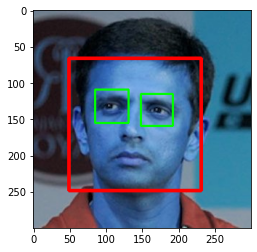

In [5]:
# Applies harrcascade to an active image, identifying eyes and face roi
cv2.destroyAllWindows()
other_image = cv2.imread('./img/Dravid/1.jpg')
for (x, y, w, h) in faces:
    
    face_img = cv2.rectangle(other_image, (x, y), (x+w, y+h), (255, 0, 0), 4)
    roi_gray = gray[y:y+h, x:x+w] #Here we specifically cascade for eyes in the face region it will provide more accuracy
    roi_color = face_img[y:y+h, x:x+w]
     
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap = "gray")
plt.show()

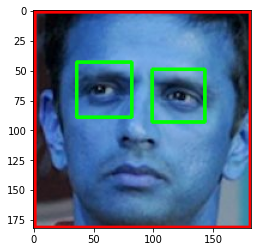

In [6]:
plt.imshow(roi_color)

In [7]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
     
        
        roi_gray = gray[y:y+h, x:x+h]
        roi_color = img[y:y+h, x:x+h]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
#         for (ex, ey, eh, ew) in eyes:
            
#             cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), 3)
        
        
        if len(eyes) >= 2:
            return roi_color
        
        
        
        
        

ONE


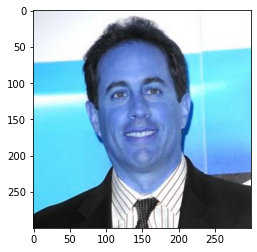

In [8]:
new_img = cv2.imread('E:\Python\Image Classification\A\model\img\jerry_seinfeld\httpimagescontactmusiccomnewsimagesjerryseinfeldjpg.jpg')
plt.imshow(new_img)
print("ONE")

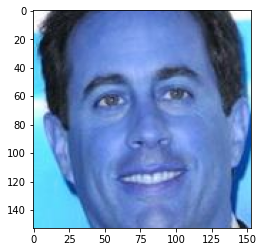

In [9]:
cropped_image = get_cropped_image('E:\Python\Image Classification\A\model\img\jerry_seinfeld\httpimagescontactmusiccomnewsimagesjerryseinfeldjpg.jpg')
plt.imshow(cropped_image)

In [10]:
path_to_data = './img/'
path_to_cr_data = './img/cropped/'


In [26]:
import os 
img_dirs = [] #Stores the path of folders present in img directory
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
        
        

In [27]:
img_dirs   


['./img/ben_afflek',
 './img/cropped',
 './img/Dravid',
 './img/jerry_seinfeld',
 './img/lionel_messi',
 './img/roger_federer']

In [31]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs: #For Each Folder in the Image Folder
    count = 1
    if img_dir == './img/cropped':
        continue
    celebrity_name = img_dir.split('/')[-1] #Get the name of the celebrity
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        
        roi_image = get_cropped_image(entry.path)
        if roi_image is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating Cropped Folders - ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_image)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count = count + 1            

ben_afflek
Generating Cropped Folders -  ./img/cropped/ben_afflek
Dravid
Generating Cropped Folders -  ./img/cropped/Dravid
jerry_seinfeld
Generating Cropped Folders -  ./img/cropped/jerry_seinfeld
lionel_messi
Generating Cropped Folders -  ./img/cropped/lionel_messi
roger_federer
Generating Cropped Folders -  ./img/cropped/roger_federer


In [15]:
import numpy as np
import pywt


def w2d(img, mode = "haar", level = 1):
    imArray = img
    #DataType COnversions
    #Convert to Grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /=255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H


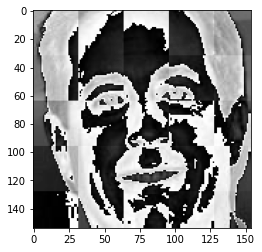

In [16]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = "gray")

In [33]:
cropped_image_dirs

['./img/cropped/ben_afflek',
 './img/cropped/Dravid',
 './img/cropped/jerry_seinfeld',
 './img/cropped/lionel_messi',
 './img/cropped/roger_federer']

In [34]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    print(celebrity_name)
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

ben_afflek
Dravid
jerry_seinfeld
lionel_messi
roger_federer


{'ben_afflek': ['./img/cropped/ben_afflek\\ben_afflek1.png',
  './img/cropped/ben_afflek\\ben_afflek2.png',
  './img/cropped/ben_afflek\\ben_afflek3.png',
  './img/cropped/ben_afflek\\ben_afflek4.png',
  './img/cropped/ben_afflek\\ben_afflek5.png'],
 'Dravid': ['./img/cropped/Dravid\\Dravid1.png',
  './img/cropped/Dravid\\Dravid2.png',
  './img/cropped/Dravid\\Dravid3.png',
  './img/cropped/Dravid\\Dravid4.png'],
 'jerry_seinfeld': ['./img/cropped/jerry_seinfeld\\jerry_seinfeld1.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld10.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld11.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld12.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld13.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld2.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld3.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld4.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld5.png',
  './img/cropped/jerry_seinfeld\\jerry_seinfeld6.png',
  './img/cr

In [35]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():

    class_dict[celebrity_name] = count
    count += 1
    


class_dict


{'ben_afflek': 0,
 'Dravid': 1,
 'jerry_seinfeld': 2,
 'lionel_messi': 3,
 'roger_federer': 4}

In [36]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_image = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_image = np.vstack((scalled_raw_image.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        x.append(combined_image)
        y.append(class_dict[celebrity_name])
        
    
        

        

In [37]:
len(y)

87

In [38]:
x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape


(87, 4096)

# Data Cleaning is Complete, now we train the model
#### We'll use SVM First

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.6818181818181818

In [43]:
# print(classification_report(y_test, pipe.predict(x_test)))

## Now using Grid Search to find the best model to train the data set


In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [52]:
# This is standarad Procedure
# We make a dict with a list of all the models we wish to use

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [81]:
#Then we iterate through each of these models 
# training our data using each of these models and then finding out the best one 



scores = []
best_estimators ={}
import pandas as pd
for algo, mp in model_params.items():
    
    pipe = make_pipeline(StandardScaler(), mp['model']) #First Scale the Data
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score = False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo, 
        'best_score': clf.best_score_, 
        'best_params': clf.best_params_
        
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df


e:\python\image classification\a\newenv\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
e:\python\image classification\a\newenv\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
e:\python\image classification\a\newenv\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.815385,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.584615,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.600000,{'logisticregression__C': 1}


In [91]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}